# Guided project Exploring eBay Car Sales Data: 



## Overview:

This project represents an exploration into data cleaning and analysis. This project uses scraped [data](https://data.world/data-society/used-cars-data) from used car advertisements on eBay Kleinanzeigen. The primary focus of the project was the introduction of basic dataset cleaning. The basic outline and work flow of this project is based of the )[Dataquest](https://app.dataquest.io/) project of the [same name](https://app.dataquest.io/c/54/m/294/guided-project%3A-exploring-ebay-car-sales-data/1/introduction) , as well the following [blog.](https://github.com/MiguelAHG/mahg-data-science/blob/master/_notebooks/2021-05-20-Basic-Data-Cleaning-eBay-Car-Sales-Data.ipynb)
I used these outlines as a reference piece, but have made my own concessions regarding the cleaning of the dataset and the Visualization. All text and code was written by myself.

The project aims to accomplish the following:
- Clean, and prepare the scraped dataset for analysis and visualization. 
- Perform basic visual analysis on the dataset
- Determine which vehicle type is most commonly featured.
- Determine which brands are most commonly featured and which brand is most expensive. 
- Determine various relationships between price and odometer reading, vehicle type, age, and vehicle damage.


# Package installs:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid") 

# Data Overview:

The dataset is a collection of over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen.

Data dictionary: 

- dateCrawled : when this ad was first crawled, all field-values are taken from this date
- name : "name" of the car
- seller : private or dealer
- offerType
- price : the price on the ad to sell the car
- abtest
- vehicleType
- yearOfRegistration : at which year the car was first registered
- gearbox
- powerPS : power of the car in PS, the metric conversion of HP
- model
- kilometer : how many kilometers the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType
- brand
- notRepairedDamage : if the car has a damage which is not repaired yet
- dateCreated : the date for which the ad at ebay was created
- nrOfPictures : number of pictures in the ad
- postalCode
- lastSeenOnline : when the crawler saw this ad last online


We will first display the first five rows of the dataframe to get an initial understanding of our dataframe.

# Brief Dataset exploration

In [2]:
autos = pd.read_csv(r"C:\Users\AlexM\OneDrive\Documents\Python\data_sets\data-society-used-cars-data\autos.csv", encoding = "latin-1" )
#encoding Latin-1 as UTF-8 gave error. 

autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


We will also display dataframe information using <code>dataframe.info</code> and <code>dataframe.describe</code> to get gain a  numerical understanding of our dataframe.

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) # This removes the scientific notation for readability
autos.describe(include = 'all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,371528.0,371528,333659,371528.0,351319,371528.0,351044,371528.0,371528.0,338142,371528,299468,371528,371528.0,371528.0,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,17295.1,NaN,NaN,2004.6,NaN,115.5,NaN,125618.7,5.7,NaN,NaN,NaN,NaN,0.0,50820.7,NaN
std,NaN,NaN,NaN,NaN,3587953.7,NaN,NaN,92.9,NaN,192.1,NaN,40112.3,3.7,NaN,NaN,NaN,NaN,0.0,25799.1,NaN
min,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1000.0,NaN,0.0,NaN,5000.0,0.0,NaN,NaN,NaN,NaN,0.0,1067.0,NaN
25%,NaN,NaN,NaN,NaN,1150.0,NaN,NaN,1999.0,NaN,70.0,NaN,125000.0,3.0,NaN,NaN,NaN,NaN,0.0,30459.0,NaN
50%,NaN,NaN,NaN,NaN,2950.0,NaN,NaN,2003.0,NaN,105.0,NaN,150000.0,6.0,NaN,NaN,NaN,NaN,0.0,49610.0,NaN
75%,NaN,NaN,NaN,NaN,7200.0,NaN,NaN,2008.0,NaN,150.0,NaN,150000.0,9.0,NaN,NaN,NaN,NaN,0.0,71546.0,NaN


### Notes From Initial Data Frame Exploration: 

From this brief exploration we have learned the following: 

#### The Data Structure:
- The dataset has 20 columns and 371527 rows. 
- 13 columns are object data types:<code>str</code>
- 7 columns are numerical data types:<code>int64</code>
- Various column entries are in German


The following columns have null values:
 - 6   vehicleType:       <code>37869 null</code>
 - 8   gearbox:           <code>20209 null</code>
 - 10  model:             <code>351044 null</code>
 - 13  fuelType:          <code>33386 null</code>
 - 15  notRepairedDamage: <code>72059 null</code>

The following columns appear to have a limited diversity of entry types and may not offer much information regarding the dataset:
- seller
- offerType
- abtest
- nrOfPictures
- notRepairedDamage

We will briefly expand our analysis on the columns with a limited diversity of entry types by viewing the unique values of the columns. This will provide us with more information about the columns and allow us to determine whether we should retain the columns for analysis.

### Exploration of columns with limited diversity:

In [5]:
autos["seller"].value_counts(dropna=False) #Counts items in seller column and provides a total of each item, includes any NaN values. 

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [6]:
autos["offerType"].value_counts(dropna=False) 

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [7]:
autos["abtest"].value_counts(dropna=False)

test       192585
control    178943
Name: abtest, dtype: int64

In [8]:
autos["nrOfPictures"].value_counts(dropna=False)


0    371528
Name: nrOfPictures, dtype: int64

In [9]:
autos["notRepairedDamage"].value_counts(dropna=False)

nein    263182
NaN      72060
ja       36286
Name: notRepairedDamage, dtype: int64

# Data Cleaning

## Removing columns which provide little or no information for analysis
Using the 'count','unique','top','freq' values from <code>dataset.describe()</code> to guide us and keeping in mind that the dataset has 371527 entries, we find the following:
- The 'Seller' column has two unique values associated with it: 'privat' and 'gewerblich'.'privat' is the most frequent entry type with '371525' entries.

- The 'offerType' column has two unique values associated with it: 'Angebot' and 'Gesuch'. 'Angebot' is the most frequent entry with '371516'entries.

- The 'abtest' column has two unique values associated with it: 'test' and 'control' with 'test' being the most frequent with '192585' entries. 

- The 'nrOfPictures' column has '371528' entries, but no numerical values associated with it.

- The 'notRepairedDamage' column has three entry types: 'nein', 'Nan', and Ja. Nein is the most frequent entry with '263182 entries.


In conjunction with the above, we determine that:

- Almost all entries for the 'Seller' Column reference 'Privat'. According to the data dictionary, this column represents whether the listing on ebay was by a seller or a commercial company. Due to the skew in the frequency of 'privat' in comparison to 'gewerblich', thus no comparative analysis can be undertaken and we will remove the column from our analysis.

- The 'offerType' column has two unique values associated with it, but no associated explanation in the data dictionary. Again, there is a skew in the frequency of 'Angebot' in comparison to 'Gesuch', thus no comparative analysis can be undertaken and we will remove the column from our analysis.

- The 'abtest' column has two unique values associated with it, but no associated explanation in the data dictionary. Due to this we will remove the column from our analysis.'

- The 'nrOfPictures' column has '371528' entries, but no numerical values associated with it. This indicates that no car listings have pictures associated with their entries. This may be a result of the scraping that was performed. Regardless, this column provides no insight and we remove the column from our analysis.

- Despite the low diversity of entry types in the 'notRepairedDamage' column, the associated entries match with the information given by the data dictionary, and thus will be kept for analysis. 

Note: We will also remove the 'dateCrawled' column from our analysis as it will provide no additional insight to any analysis performed. 




In [10]:
#Removing columns from dataframe
autos.drop(["seller","offerType","abtest","nrOfPictures","dateCrawled"],axis = 1,inplace = True)

## Column Labels

As can be seen above, all columns are written in CamelCase. We will convert the column labels to snake_case as is standard as it allows for easier use in the code. We also note that numerous entries are not in English and we will rectify this issue below.


We will again display the dataframe to confirm that we have removed the above columns. 

In [11]:
autos.head() 

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [12]:
#creating a renaming dictionary to change column indexes to snake case and relabeling 

name_dictionary = {
                   'name':'name',
                   'price':'price',
       'vehicleType':'vehicle_type',
                   'yearOfRegistration':'registration_year',
                   'gearbox':'gearbox',
                   'powerPS':'power_ps',
                   'model':'model',
       'kilometer':'odometer',
                   'monthOfRegistration':'registration_month',
                   'fuelType':'fuel_type',
                   'brand':'brand',
       'notRepairedDamage':'unrepaired_damage',
                   'dateCreated':'ad_created',
                   'postalCode':'postal_code',
       'lastSeen':'last_seen'}


autos = autos.rename(columns = name_dictionary)

## Outliers in Numerical data

We will now inspect the ranges of numerical columns to see if there are any unusually high or low values.

In [13]:
autos.describe(include = np.number) #returns numerical columns only.

,price,registration_year,power_ps,odometer,registration_month,postal_code
count,371528.0,371528.0,371528.0,371528.0,371528.0,371528.0
mean,17295.1,2004.6,115.5,125618.7,5.7,50820.7
std,3587953.7,92.9,192.1,40112.3,3.7,25799.1
min,0.0,1000.0,0.0,5000.0,0.0,1067.0
25%,1150.0,1999.0,70.0,125000.0,3.0,30459.0
50%,2950.0,2003.0,105.0,150000.0,6.0,49610.0
75%,7200.0,2008.0,150.0,150000.0,9.0,71546.0
max,2147483647.0,9999.0,20000.0,150000.0,12.0,99998.0


We note the following unusual characteristics:

- price: The minimum price(in euros) is: € 0 (free) and the max price is: € 2,147,483,647 (2 Billion). Incidentally, this is the [eighth Mersenne prime.](https://en.wikipedia.org/wiki/2,147,483,647)

- registration_year: The minimum registration year is: 1000, and the maximum registration year is: 9999.

- power_ps: The minimum PS is: 0 PS and the maximum PS is: 20,000 PS. Note that the 75th percentile has a value of 150 - thus 20,000 represents a very large increase. 
     - Note that PS is Metric Horsepower, which is roughly equivalent to Horsepower. 

- registration_month: The values of registration month range from 0 to 12.This represents a total 13 months.

### Cleaning the Price column.

As we saw above, the minimum price is €0 (free) and the maximum price is €2,147,483,647 (2 Billion+). 
Entries with the minimum price of €0 may have this value as a placeholder, as a missing value, or to indicate that the seller would like to trade the vehicle. With no way to determine this, we will drop the entries with a price of €0 from the data set.

The extremely high maximum price leads us to believe there are other significantly large outliers. We will either confirm or refute this claim below.

We will first start the process of determining a reasonable listing price. First we will get a better understanding of the maximum and minimum prices and the frequency in which they occur. 

In [14]:
autos["price"].value_counts().sort_index(ascending=True) #Counts unique values and displays values from low to high

0             10778
1              1189
2                12
3                 8
4                 1
              ...  
32545461          1
74185296          1
99000000          1
99999999         15
2147483647        1
Name: price, Length: 5597, dtype: int64

In [15]:
autos["price"].value_counts().sort_values(ascending=False) #Counts unique values and displays number of values from low to high

0        10778
500       5670
1500      5394
1000      4649
1200      4594
         ...  
2610         1
20620        1
16689        1
9964         1
10985        1
Name: price, Length: 5597, dtype: int64

Immediately we can determine from the above that the following holds:
- There are over 10,000 entries with a price of 0, which represents the most common value.
- There are several significantly large outliers, which confirms our assumption. 
- There are 5597 unique prices. 
- After a price of zero; €500, €1500, €1000, and €1200 represent the most common listing price. 

We will now remove the outliers from this column.

Originally, using a heuristic approach, I created bins between the values of 500 and 100,000 as these values seemed appropriate given that 500 was the second most common value and there were 75 entries between the values of 90050.0 and 100,000.The upper bound of this approach seemed reasonable as there may be some vintage cars in the listings and thus skew the upper bound.

To keep this project simple, I instead use the interquartile range (IQR) to clean the data. The IQR provides reasonable upper and lower bounds based on statistical dispersion. See this [Wikipedia article](https://en.wikipedia.org/wiki/Interquartile_range) for more information. 

We now create our Inter quartile range by finding the difference between the third quartile and second quartile of our data. We then set the lower bound equal to the first quartile minus 1.5* the IQR and set our upper bound equal to the third quartile plus 1.5* the IQR.


In [16]:
Q1 = autos["price"].quantile(0.25) 
Q3 = autos["price"].quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

autos = autos.loc[autos["price"].between(lower_bound,upper_bound)] 
print('Our lower bound is:',lower_bound)
print('Our upper bound is:',upper_bound)


Our lower bound is: -7925.0
Our upper bound is: 16275.0


A digression on why our lower bound is negative is outside of the scope of this project, and will not be mentioned here. Despite this negative lower bound, we can continue with our analysis as the minimum price is €0 and within the bounds. 
Recall from above we determined that zero was the most frequent price, and the next most frequent price is €500.

We will make a brief exploration into prices between €101 and €499 to determine whether values in the range add value to the project.The arbitrary lower bound of €100 has been used as there are limited values below this price. 

In [17]:
lower_price = autos.loc[autos['price'].between(101,499)]
lower_price.describe()

,price,registration_year,power_ps,odometer,registration_month,postal_code
count,21710.0,21710.0,21710.0,21710.0,21710.0,21710.0
mean,312.0,2001.2,62.3,135528.6,4.3,47137.7
std,102.8,117.5,170.8,36389.5,3.9,25786.3
min,101.0,1000.0,0.0,5000.0,0.0,1069.0
25%,230.0,1996.0,0.0,150000.0,0.0,26789.0
50%,300.0,1998.0,60.0,150000.0,4.0,45886.0
75%,400.0,2000.0,90.0,150000.0,7.0,65817.0
max,499.0,9999.0,12684.0,150000.0,12.0,99998.0


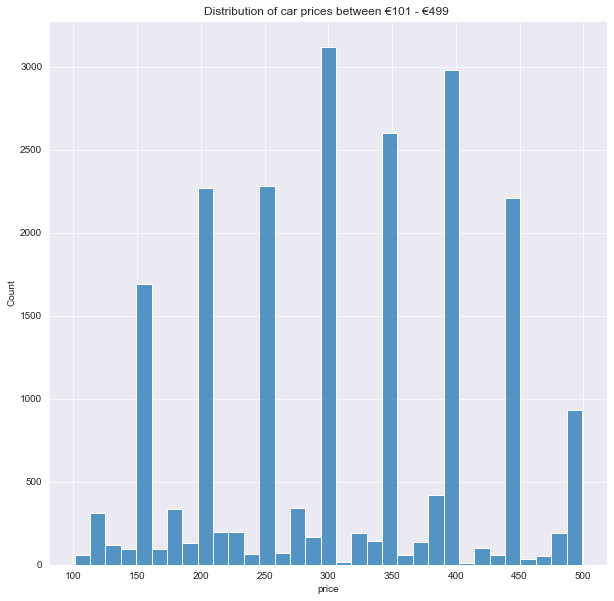

In [18]:
plt.figure(figsize=(10, 10))
sns.histplot(data=lower_price,
                 x='price'
            ).set(title='Distribution of car prices between €101 - €499 ')

plt.show()

From the basic descriptive statistics and the visualization of the price distributions between €101 and €499, we will choose to remove all values below the 25th percentile(€230). A noted observation is the tendency for users to place their cars at the rounded numbers of of 100's and 50's.  

In [19]:
autos = autos.loc[autos["price"]>= 230] #remove entries with price less than 500.

In [20]:
print('The size of our dataset is now:',autos.shape)

The size of our dataset is now: (323660, 15)


We now visualize the distribution of prices inclusive of the upper bound we have selected:

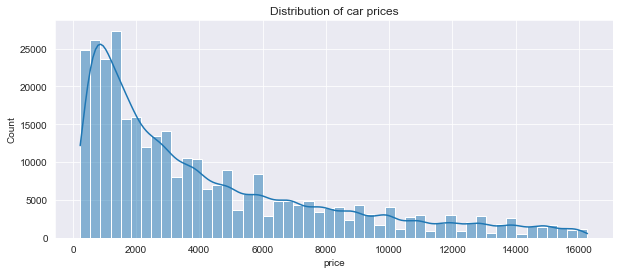

In [21]:
plt.figure(figsize=(10, 4))
ax =sns.histplot(data=autos,
                 x='price', kde=True,
                bins=50).set(title='Distribution of car prices')
plt.show()

With the cleaning of the price column completed, and matching our assumptions of prices, we will turn to cleaning the registration_year column. We will return to applying more limited analysis to the price column below. 

### Cleaning the registration_year column.

As we saw above, the minimum registration year is: 1000 and the maximum registration year is: 9999. Obviously these values are incorrect. Note that this dataset was scraped in 2016, and so the maximum registration year can be no higher than 2016.

As we can automatically have an upper bound of 2016, we will explore the lower bound of our data. 
According to this [wikipedia page](https://en.wikipedia.org/wiki/Automotive_industry_in_Germany#Early_history) on the Automotive industry in Germany - in 1901 there were 900 cars produced each year. Using this information, we will create a filter between the years 1901 and 1959. The year 1959 was chosen as I am making the assumption that cars were a fairly common household item by this year.


First we will gain a brief numerical understanding of our lower bound. 

In [22]:
lower_b = autos.loc[autos['registration_year'].between(1901,1959)] #filtering the registration between year 1901 and 1959
lower_b["registration_year"].value_counts().sort_index()


1910    23
1923     2
1925     1
1928     2
1929     5
1930     1
1931     1
1932     2
1934     2
1935     3
1936     2
1937    10
1938     8
1940     2
1941     2
1942     2
1943     3
1944     1
1945     4
1946     1
1948     1
1949     1
1950    10
1951     5
1952     7
1953    13
1954     8
1955    10
1956    22
1957    13
1958    15
1959    27
Name: registration_year, dtype: int64

In [23]:
lower_b["registration_year"].describe()

count    209.0
mean    1945.5
std       15.4
min     1910.0
25%     1937.0
50%     1953.0
75%     1957.0
max     1959.0
Name: registration_year, dtype: float64

In [24]:
lower_b.corr()

,price,registration_year,power_ps,odometer,registration_month,postal_code
price,1.0,0.3,-0.0,-0.1,0.1,0.1
registration_year,0.3,1.0,0.0,0.1,0.4,-0.0
power_ps,-0.0,0.0,1.0,0.1,0.1,-0.0
odometer,-0.1,0.1,0.1,1.0,0.0,0.0
registration_month,0.1,0.4,0.1,0.0,1.0,0.0
postal_code,0.1,-0.0,-0.0,0.0,0.0,1.0


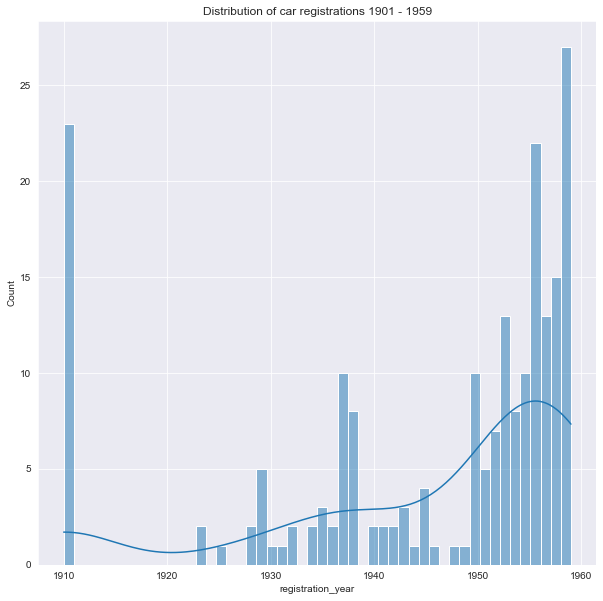

In [25]:
plt.figure(figsize=(10, 10))
sns.histplot(data=lower_b,
                 x='registration_year',
                bins = 50, kde=True
           ).set(title='Distribution of car registrations 1901 - 1959')

plt.show()

From the basic descriptive statistics and the visualization of our filter, we observe the following:

- There are no vehicles for sale with a registration year below 1910, or between the years 1911 and 1923.
- There are 209 listings within this filter.
- 75% of all vehicles have a registration year above 1957.
- There appears to be a weak correlation (Pearsons 0.3) between price and registration year.

Regarding cars with registration years at or below 1959, we expect the listing price to be quite high as these cars could be considered collectibles. We will quickly observe this relationship between the registration year and median price to further inform our lower bound. 

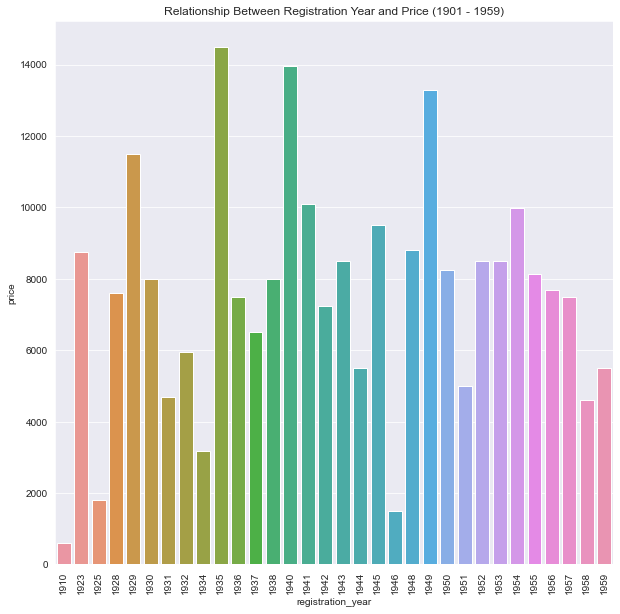

In [26]:
plt.figure(figsize=(10, 10)) 
ax = sns.barplot(data=lower_b,y = 'price',
                 x = 'registration_year',
                 estimator = np.median,
                 ci = None
               ).set(title='Relationship Between Registration Year and Price (1901 - 1959)')
plt.xticks(rotation=90)
plt.show()

From the above visualization, we can see that there is a limited and seemingly random relationship between price and registration year. Using a similar method to cleaning the prices, we will remove all entries below the 25th percentile. 

In [27]:
autos = autos.loc[autos['registration_year'].between(1937, 2016)]
autos['registration_year'].describe()

count   310180.0
mean      2002.5
std          6.6
min       1937.0
25%       1999.0
50%       2003.0
75%       2007.0
max       2016.0
Name: registration_year, dtype: float64

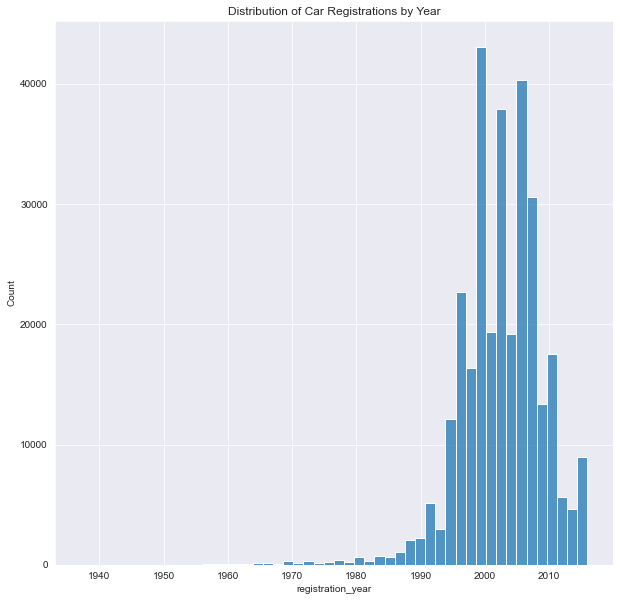

In [28]:
plt.figure(figsize=(10, 10))
ax = sns.histplot(data=autos,
                 x='registration_year',
                bins=50).set(title='Distribution of Car Registrations by Year')
plt.show()

In [29]:
print('The size of our dataset is now:',autos.shape)

The size of our dataset is now: (310180, 15)


With the cleaning of the registration_year column complete, we will turn to cleaning the registration_month column.

### Cleaning the registration_month column.

As we saw above, The values of registration month range from 0 to 12, which implies there are 13 months total. Obviously, we must inspect this error and determine a course of action. 

Note the visualization below:

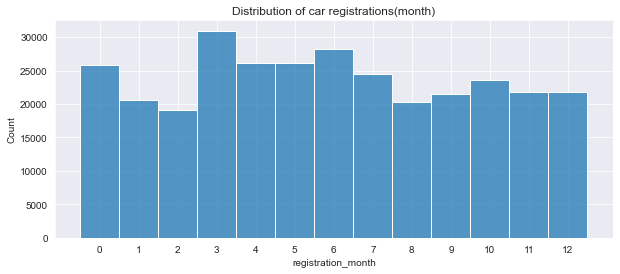

In [30]:
plt.figure(figsize=(10, 4))
plt.xticks(([0,1,2,3,4,5,6,7,8,9,10,11,12]))
ax = sns.histplot(data=autos,
                 x='registration_month',
                discrete=True,
            )
ax.set(title='Distribution of car registrations(month)')
plt.show()

As we can see,the value zero occurs over 25,000 times.This value may represent placeholder values, or may be an error from the scraping. As we have no other information regarding this value, we will drop all rows with zero as the registration month. 

In [31]:
autos = autos.loc[autos['registration_month']>=1]

### Cleaning the power_ps column.

As was noted above, The minimum PS is: 0 PS and the max PS is: 20,000 PS. 
Note, PS (or Metric Horsepower) is roughly equivalent to HP. 

We first notice that the 75th percentile of the power_ps column is 143, thus the maximum of 20,000 PS represents a significant outlier.
Before cleaning the data, we will first gain a numerical and visual understanding of the data. We will create a filter between 0 and 450. This upper bound represents the maximum PS in most commercially available vehicles.

In [32]:
autos['power_ps'].describe()

count   284347.0
mean       114.2
std        179.3
min          0.0
25%         75.0
50%        105.0
75%        143.0
max      20000.0
Name: power_ps, dtype: float64

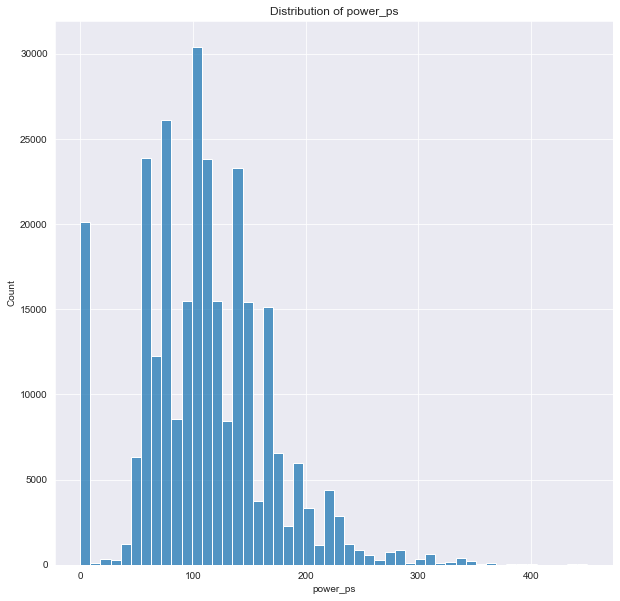

In [33]:
power_ps_bound = autos.loc[autos['power_ps'].between(0, 450)] 
plt.figure(figsize=(10, 10))
ax =sns.histplot(data=power_ps_bound,
                 x='power_ps',
                bins=50).set(title='Distribution of power_ps')
plt.show()

The visualization and description of the power_ps column presents the following findings: 

- There are 20000 listings with 0 PS
- Most listings have a PS value between 50 and 250.
- The mean value is 179.3 PS
- There are limited entires with a PS above 400. 

Using the above information, we will create a filter to futher clean our data. 

In [34]:
autos = autos.loc[autos['power_ps'].between(50, 400)] #creating a filter with a power PS ranging from 50 to 400.
autos['power_ps'].describe()

count   259663.0
mean       120.4
std         50.2
min         50.0
25%         80.0
50%        112.0
75%        150.0
max        400.0
Name: power_ps, dtype: float64

In [35]:
print('The size of our dataset is now:',autos.shape)

The size of our dataset is now: (259663, 15)


# Data Transformation


## Non-english entries

As this dataset was scraped from a German website, most worded entries are of German origin. Below, we will create dictionaries to remap/translate the German words to English words.

In [36]:
#Create a series of unique entry types
vehicle_type_series = pd.Series(autos["vehicle_type"].unique())
gearbox_series = pd.Series(autos["gearbox"].unique())
fuel_type_series = pd.Series(autos["fuel_type"].unique())
unrepaired_damage_series = pd.Series(autos["unrepaired_damage"].unique())

#create a dictionary from the series above and use the print function so we can manually create the dictionaries. 
print(vehicle_type_series.to_dict())
print(gearbox_series.to_dict())
print(fuel_type_series.to_dict())
print(unrepaired_damage_series.to_dict())

{0: 'suv', 1: 'kleinwagen', 2: 'limousine', 3: 'cabrio', 4: 'bus', 5: 'kombi', 6: 'coupe', 7: nan, 8: 'andere'}
{0: 'automatik', 1: 'manuell', 2: nan}
{0: 'diesel', 1: 'benzin', 2: nan, 3: 'lpg', 4: 'andere', 5: 'hybrid', 6: 'cng', 7: 'elektro'}
{0: nan, 1: 'nein', 2: 'ja'}


In [37]:
vehicleType_dict = {'coupe':'coupe',
'suv':'suv',
'kleinwagen':'small car',
'limousine':'limousine',
'cabrio':'convertible',
'bus':'bus',
'kombi':'kombi',
'andere':'other'}

gearbox_dict = {'manuell':'manual',
'automatik':'automatic'
}

fuelType_dict = {'benzin':'petrol',
'diesel':'diesel',
'lpg':'lpg',
'andere':'other',
'hybrid':'hybrid',
'cng':'cng',
'elektro':'electric'}

notRepairedDamage_dict = {'ja':'yes',
'nein':'no'}

In [38]:
#create a data dictionary to map german words to english words
autos["gearbox"] = autos["gearbox"].map(gearbox_dict)
autos["vehicle_type"] = autos["vehicle_type"].map(vehicleType_dict)
autos["fuel_type"] = autos["fuel_type"].map(fuelType_dict)
autos["unrepaired_damage"] = autos["unrepaired_damage"].map(notRepairedDamage_dict)



We will display the head of the dataframe to confirm that our mappings have been applied. 

In [39]:
autos.head()

,name,price,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,GOLF_4_1_4__3TÜRER,1500,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,Peugeot_206_CC_110_Platinum,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,67112,2016-04-05 18:18:39


It appears that our dictionaries have successfully remapped the German words to English. With this in mind, we will now remove the underscores that appear in the 'brand','name', and model columns and replace them with a space.

In [57]:
#remove underscore from car brands 
autos["brand"] = autos["brand"].str.replace("_", " ")

#remove underscore from car name
autos["name"] = autos["name"].str.replace("_", " ")

#remove underscore from car model
autos["model"] = autos["model"].str.replace("_", " ")

We will display the head of the dataframe to confirm that the underscores have been applied. 

In [58]:
autos.head()

,name,price,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
2,"Jeep Grand Cherokee ""Overland""",9800,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05 12:47:46
3,GOLF 4 1 4 3TÜRER,1500,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17
4,Skoda Fabia 1.4 TDI PD Classic,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21
5,BMW 316i e36 Limousine Bastlerfahrzeug Ex...,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,33775,2016-04-06 19:17:07
6,Peugeot 206 CC 110 Platinum,2200,convertible,2004,manual,109,2 reihe,150000,8,petrol,peugeot,no,2016-04-01,67112,2016-04-05 18:18:39


As we can see, the underscores have now been removed. We will now perform our final cleaning task by converting the strings in the 'ad_created' and 'last_seen' column. With the conversion from strings to datetime objects, Pandas will recognize the entries as dates and this will allow us to visualize our data. 

## Strings to Datetime Objects

In [40]:
format_str = "%Y-%m-%d %H:%M:%S"
autos["ad_created"] = pd.to_datetime(autos["ad_created"], format = format_str) #converts to datetime64[ns]
autos["last_seen"] = pd.to_datetime(autos["last_seen"], format = format_str)



# Visual Data Analysis

Finally, we near the end of this project. We will now perform some basic visualizations of the dataset which may be of interest, given the dataset. No statistical analysis will be performed, as it is out of the scope of this project.

### Top Ten Most Common Brand of Car For Sale

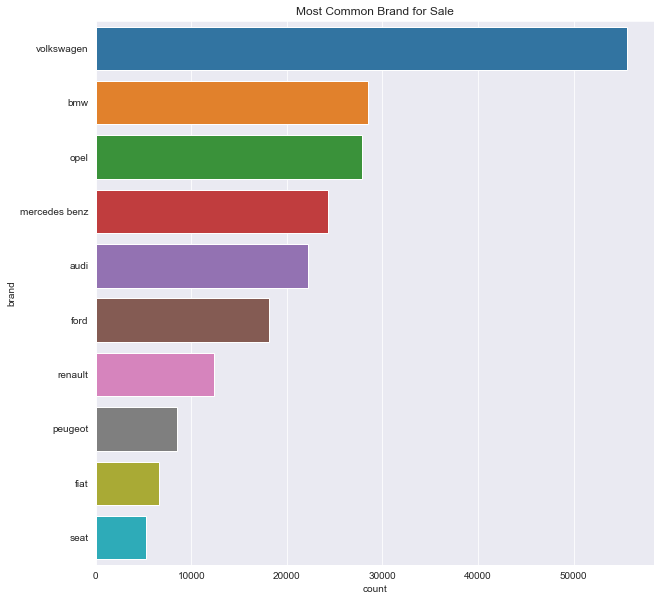

In [42]:
order_count_top_10 = autos['brand'].value_counts().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10, 10))
ax =sns.countplot(data=autos,
                 y = 'brand',
                order = order_count_top_10
               ).set(title='Top Ten Most Common Brand of Car For Sale')

As we can see from the visualization above, Volkswagen has the highest count at approximately 55000 listings. This is followed by Bmw and Opel, which both have just under 30000 listings. 

### Count of Listing By Brand


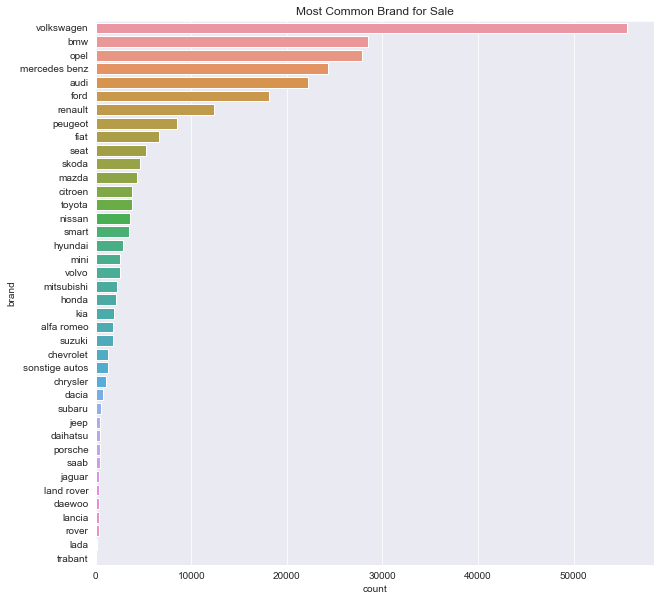

In [43]:
order_count = autos['brand'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10, 10))
ax =sns.countplot(data=autos,
                 y = 'brand',
                order = order_count
               ).set(title='Count of Listing By Brand')

As we can see from this visualization, the brands: Trabant, Lada, and Rover have the least listings. Trabant has 5 Listings, lada has 145 listings, and Rover has 314 listings. 

### Median price of Listing by Brand


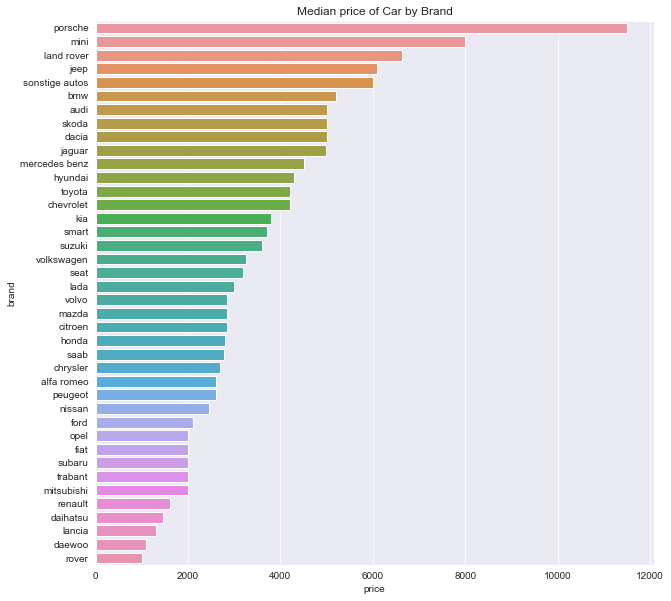

In [44]:
order_price=autos.groupby('brand')['price'].agg('median').sort_values(ascending=False).index
plt.figure(figsize=(10, 10))
ax =sns.barplot(data=autos,
                 x = 'price',
                 y = 'brand',
                estimator = np.median,
                order = order_price,
                ci = None
               ).set(title='Median Price of Listing by Brand')

plt.show()

As we can see from the visualization above, the median price varies from approximately €1000 to just under €12000. 
Porsche has the highest median price of €11500, followed by Mini, and Land Rover with median prices of €7990, and €6625 respectively. 

Rover, Daewoo, and Lancia have the lowest median prices, which are all under €1500.

### Most Common Vehicle Type


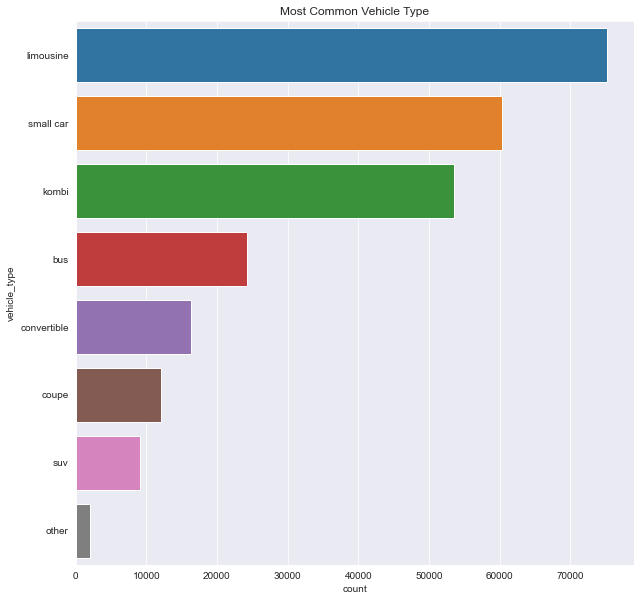

In [45]:
order_count_type = autos['vehicle_type'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10, 10))
ax =sns.countplot(data=autos,
                 y = 'vehicle_type',
                  order = order_count_type
               ).set(title='Most Common Vehicle Type')

Interestingly, 'Limousine' is the most common type of car in the dataset, with a count of approximately 75000. This is followed by the type 'Small Car' with a count of approximately 60000.

### Median Price of Vehicle by Type


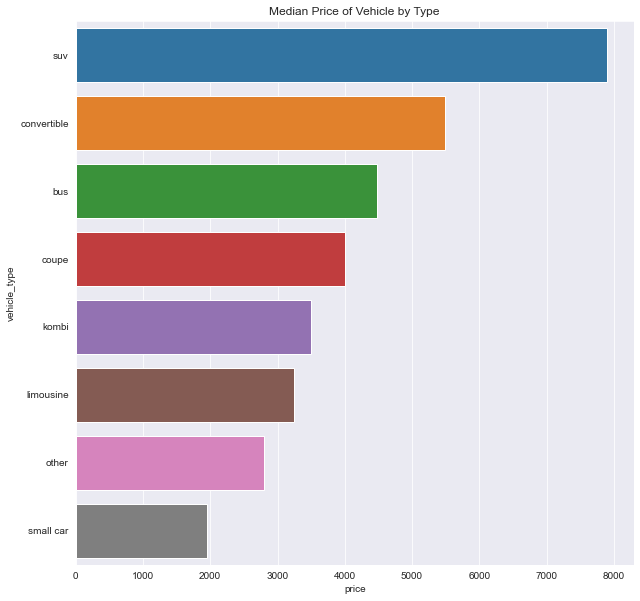

In [46]:
order_car = autos.groupby('vehicle_type')['price'].agg('median').sort_values(ascending=False).index
plt.figure(figsize=(10, 10))
ax =sns.barplot(data=autos,
                 x = 'price',
                 y = 'vehicle_type',
                estimator = np.median,
                order = order_car,
                ci = None
                ).set(title='Median Price of Vehicle by Type')
plt.show()

In relation to the to most common vehicle type for sale, we have a visualization of the median price of those vehicle type above. As can be seen: Suv has the highest median price of just under €8000, and small cars have the lowest median price of just under €2000.

### Median Price of Car by Odometer


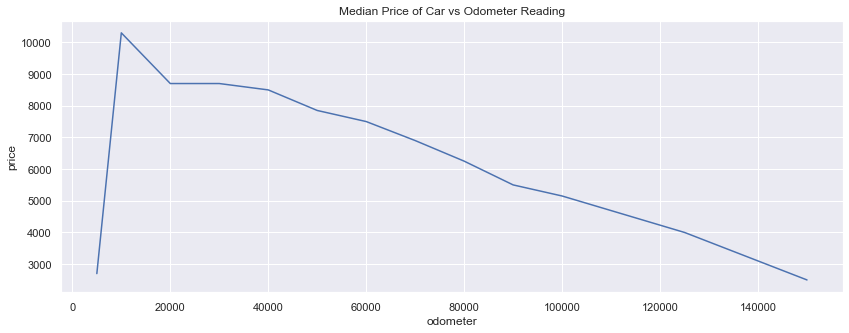

In [74]:
plt.figure(figsize = (14, 5))
plt.title(label='Median Price of Car vs Odometer Reading')
ax = sns.lineplot(data=autos,
                 x = 'odometer',
                 y = 'price',
                 estimator = np.median,
                 ci=None
            )
        
plt.show()

This graph confirms the base assumption that the higher the odometer reading, the lower the asking price for the car.

### Median Price of Car by Registration Year'


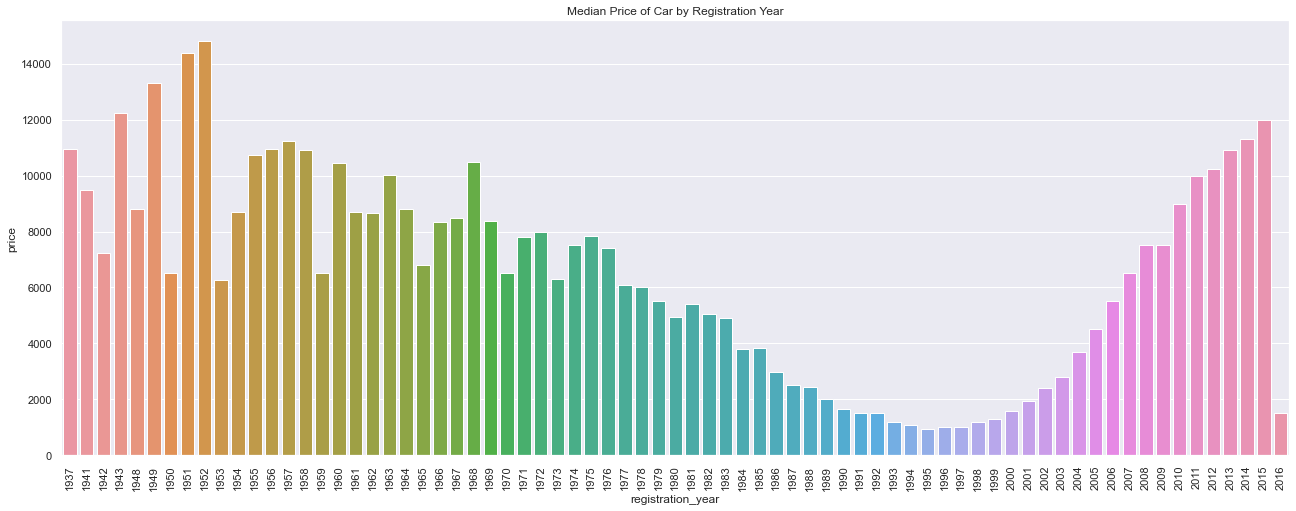

In [76]:
# relation between age and selling price
sns.set(rc={'figure.figsize':(22,8)})
sns.barplot(data=autos,
                 x = 'registration_year',
                 y = 'price',
                estimator = np.median,
                 ci=None,
               ).set(title='Median Price of Car by Registration Year')
plt.xticks(rotation=90)
plt.show()

This visualization is a presentation of the relationship between the median price of the car that is listed and the year in which the car was registered. Note the following:
- There is a downward trend in price from the mid 19070's until 1997, after which the median price begins to trend upwards. 
- The year 2016 has a very low median price, this is most likely due to limited entries, as the dataset was scraped in 2016.
- Cars in 1952 have the highest median price of approximately €14500.
- Cars in 1995 have the lowest median price of approximately €1000.


### Median Price of Car With Damage vs No Damage'


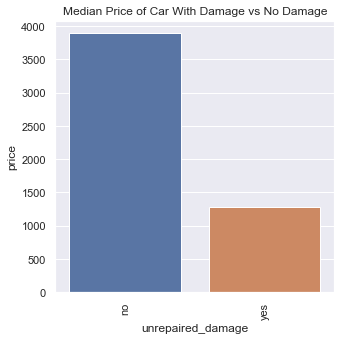

In [67]:
plt.figure(figsize=(5, 5))
plt.title('Median Price of Car With Damage vs No Damage')
plt.xticks(rotation = 90)
sns.barplot(
    data = autos,
    x = 'unrepaired_damage',
    y = 'price',
    estimator = np.median,
    ci = None
)
plt.show()

This graph confirms the base assumption that cars with damage have a lower median listing price than cars that have no damage.

# Summary:

This project used scraped data and was focused on basic 'data cleaning'. The cleaning that was performed related to the usability of the dataset for any future analysis. The cleaning performed involved the following:

- Removing columns with data that provided little insight.
- Reformatting headers, strings, and dates for the purpose of usability and readability. 
- Removing numerical outliers.

Alongside the 'data cleaning', we also used visualizations to enhance our understanding of the dataset that we were working with. The visualizations helped guide our thought processes in determining which entires to remove. 

Various visualizations were also performed to generate understanding of the cleaned dataset. We visualized the following:
- Median Price of Car With Damage vs No Damage'
- Median Price of Car by Registration Year'
- Median Price of Car by Odometer
- Median Price of Vehicle by Type
- Most Common Vehicle Type
- Median price of Listing by Brand
- Count of Listing By Brand
- Top Ten Most Common Brand of Car For Sale

In future, I may return to this project to perform further analysis on the dataset. With new tools, there may be interesting insights to be gained.
